## Ford GoBike System

In this project we are using the ford gobike system data
Explore it, Access it, Clean it and Visualization.

In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests 
import os
import zipfile

%matplotlib inline

In [2]:
f_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
f_gobike.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### Data Assesment

In [4]:
f_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Check null value for each column
f_gobike.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check duplicated row
f_gobike.duplicated().sum()

0

### Data Assesment Conclusion

#### Quality Issues

>start_time and end_time columns in object dtype

>start_station_id and end_station_id columns in int64 dtype


>bike_id column in int64 dtype

>user_type in object dtype

> Seprate the State date from the start time and store in diffrent column

> Use the longtitude and latitude to calculate distance

#### Tidiness Issues

>Column not needed should be removed

### Data Cleaning


The programmatic data cleaning process:

Define
Code
Test

In [7]:
# Define: Make a new copy before doing any operation, so we can refer back to the old ones.
f_gobike_clean = f_gobike.copy()

In [8]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
  
        
        'bike_id': 'object',
        'user_type': 'category'}

f_gobike_clean = f_gobike_clean.astype(dtype)

# Test
f_gobike_clean .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [9]:
#Define: Calculate the distance

#Code
# calculate the distance
f_gobike_clean['distance_covered'] = np.sqrt((f_gobike_clean.start_station_longitude - f_gobike_clean.end_station_longitude) ** 2
                               + (f_gobike_clean.start_station_latitude - f_gobike_clean.end_station_latitude) ** 2)

#Test
f_gobike_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
1             23.0                     The Embarcadero at Steuart St   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
1               37.791464              -122.391034           81.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
1            -122.393170    2535    Customer                NaN           NaN   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   

  bike_share_for_all_trip  distance_covered  
0                      No          0.005067  
1                      No          0.015730  
2                      No          0.027784  
3                      No          0.002721  
4                     Yes          0.025835

In [10]:
#Define: Extaract weekdays from the start time 

#Code
# extract start time weekdays
f_gobike_clean['start_time_weekday']=f_gobike_clean['start_time'].dt.strftime('%a')

#Test
f_gobike_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
1             23.0                     The Embarcadero at Steuart St   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
1               37.791464              -122.391034           81.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
1            -122.393170    2535    Customer                NaN           NaN   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   

  bike_share_for_all_trip  distance_covered start_time_weekday  
0                      No          0.005067                Thu  
1                      No          0.015730                Thu  
2                      No          0.027784                Thu  
3                      No          0.002721                Thu  
4                     Yes          0.025835                Thu

In [11]:
#Define : Calculate the total time spent on a ride

#Code
f_gobike_clean['totalride_time']=f_gobike_clean.end_time-f_gobike_clean.start_time

#Test
f_gobike_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
1             23.0                     The Embarcadero at Steuart St   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
1               37.791464              -122.391034           81.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
1            -122.393170    2535    Customer                NaN           NaN   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   

  bike_share_for_all_trip  distance_covered start_time_weekday  \
0                      No          0.005067                Thu   
1                      No          0.015730                Thu   
2                      No          0.027784                Thu   
3                      No          0.002721                Thu   
4                     Yes          0.025835                Thu   

          totalride_time  
0 0 days 14:29:45.830000  
1 0 days 11:48:41.267000  
2 0 days 17:10:54.928000  
3 0 days 10:08:10.832000  
4 0 days 00:26:25.525000

In [12]:
#Define: Drop columns not needed

#Code
#drop column in the datset that wont be used
f_gobike_clean.drop(columns=["start_station_latitude", "start_station_longitude","end_station_latitude","end_station_longitude"],axis=1,inplace=True)

#Test
f_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             183412 non-null  int64          
 1   start_time               183412 non-null  datetime64[ns] 
 2   end_time                 183412 non-null  datetime64[ns] 
 3   start_station_id         183215 non-null  object         
 4   start_station_name       183215 non-null  object         
 5   end_station_id           183215 non-null  object         
 6   end_station_name         183215 non-null  object         
 7   bike_id                  183412 non-null  object         
 8   user_type                183412 non-null  category       
 9   member_birth_year        175147 non-null  float64        
 10  member_gender            175147 non-null  object         
 11  bike_share_for_all_trip  183412 non-null  object         
 12  di

In [13]:
f_gobike_clean.shape

(183412, 15)

### What is the structure of your dataset?

> The Structure of the dataset,it has 183412 rows and has 15 columns

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is the duration_sec, user_type column

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From the main feature above i belive colums like station name will be useful. extracting the hours from the duration time and also the distance covered from the the start and end time

### Functions

In [54]:
def title_axes(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)

In [60]:
def show_chart(data, mask1, mask2, color1, color2, label1, label2, title, xlabel, ylabel):
    data[mask1].hist(alpha=0.5, bins=100, color=color1,label=label1)
    data[mask2].hist(alpha=0.5, bins=100, color=color2,label=label2)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Univariate Exploration



### Average Trip Durations

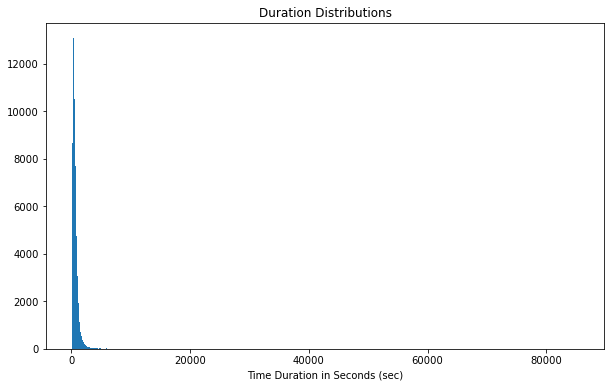

In [14]:
plt.figure(figsize=(10,6))
plt.title('Duration Distributions')
bins = np.arange(0, f_gobike_clean['duration_sec'].max()+50, 50)
plt.hist(data = f_gobike_clean, x = 'duration_sec', bins=bins)
plt.xlabel('Time Duration in Seconds (sec)');



In [15]:
#describe the data
f_gobike_clean['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

The average secound duration is 726.078435 and it skewed to the right

### Bike service based on days

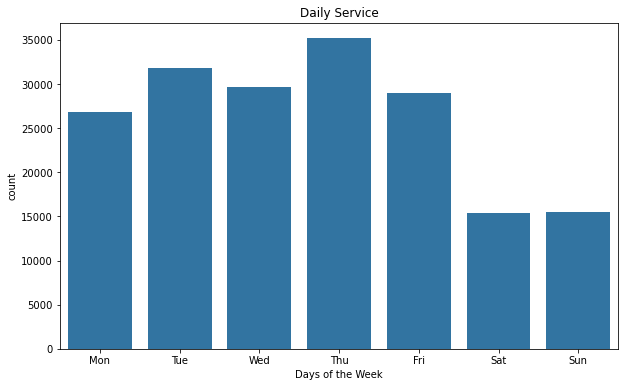

In [16]:
#Geting the value counts of the days and plotting a bar chart 

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('Daily Service')
sb.countplot(data=f_gobike_clean, x='start_time_weekday', order=days,color=base_color)
plt.xlabel('Days of the Week');


Got the value counts of the days of the week from the start week day column and visualized using a bar chart. 

### Station Analysis 

### Popular Station

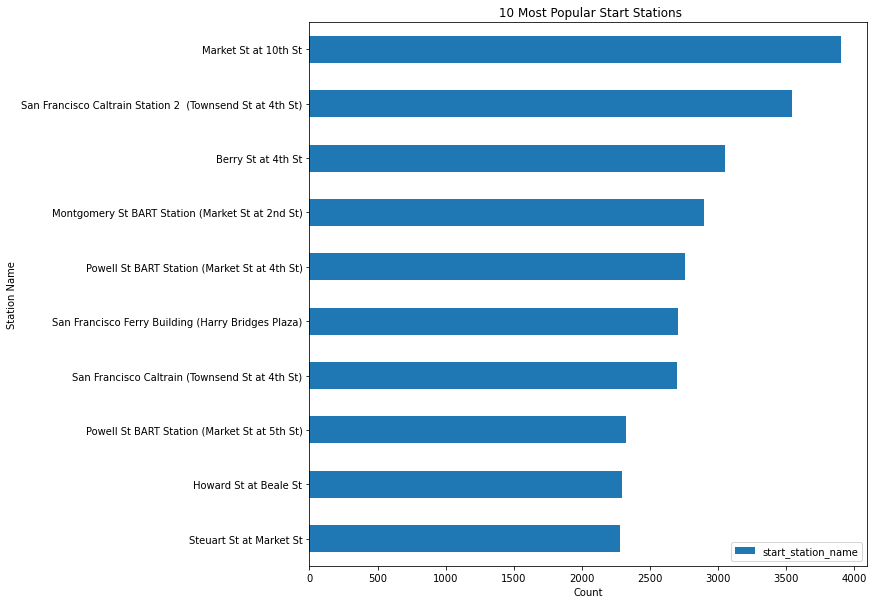

In [55]:

#Top 10 station

s_station = pd.DataFrame( f_gobike_clean. start_station_name.value_counts()[:10])
s_station.plot(kind="barh", figsize=(10,10))
title_axes("Count","Station Name",' 10 Most Popular Start Stations')
plt.gca().invert_yaxis()
plt.show();


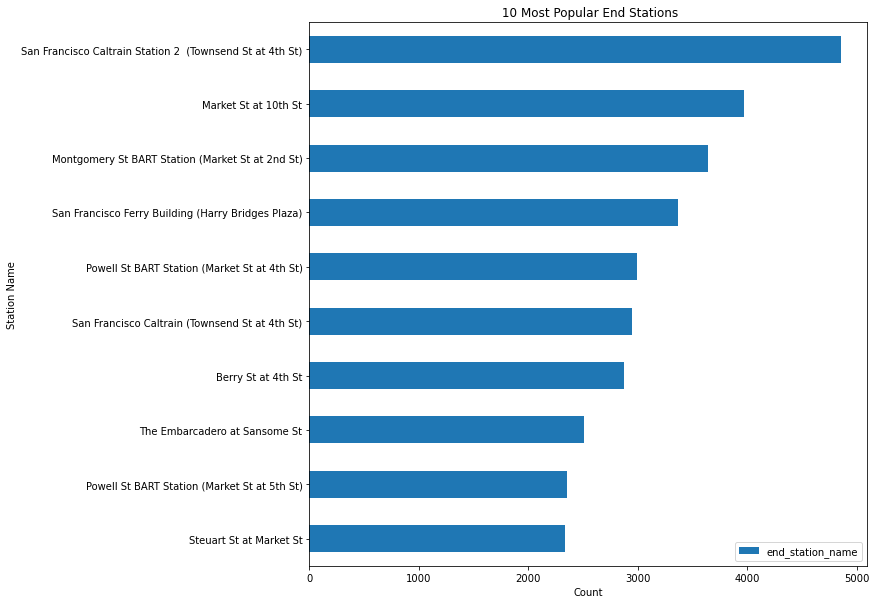

In [56]:

#Top 10 station

e_station = pd.DataFrame(f_gobike_clean.end_station_name.value_counts()[:10])
e_station.plot(kind="barh", figsize=(10,10))
title_axes("Count","Station Name",' 10 Most Popular End Stations')
plt.gca().invert_yaxis()
plt.show();


In [19]:
# Make new variable for start and end stations 
compare_start = f_gobike_clean.start_station_name.value_counts()[:10]
compare_end = f_gobike_clean.end_station_name.value_counts()[:10]

# Check wheter the station is popular in both start and end 
for s in compare_start.index:
    if s in compare_end:
        print(s)

Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Powell St BART Station (Market St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
San Francisco Caltrain (Townsend St at 4th St)
Powell St BART Station (Market St at 5th St)
Steuart St at Market St


Check the  10 popular station for both start station and end station and visualized it using a horizontal bar chart. and also checked if they are similar stations betwen both and they have 9 stations in common which was displayed

### Least Popular Station

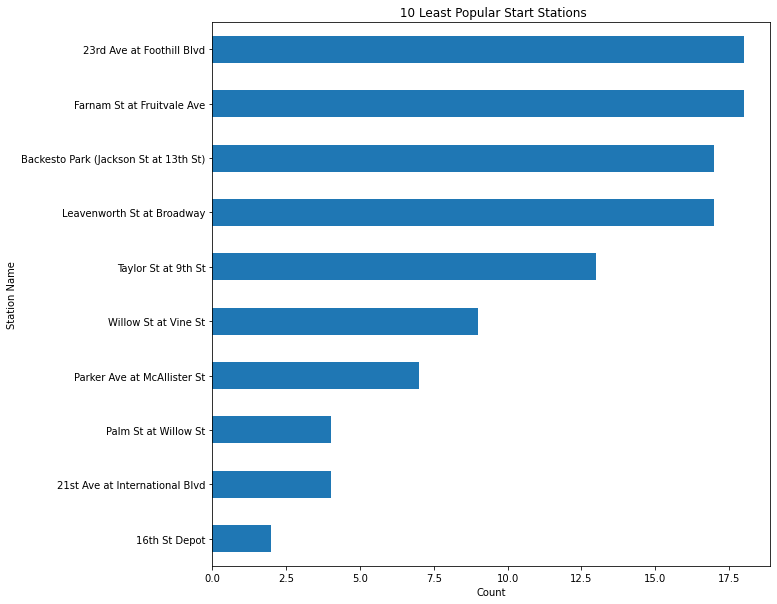

In [59]:
s_station = f_gobike_clean.start_station_name.value_counts().tail(10)
s_station.plot(kind="barh", figsize=(10,10))
title_axes("Count","Station Name",' 10 Least Popular Start Stations')
plt.gca().invert_yaxis()
plt.show();


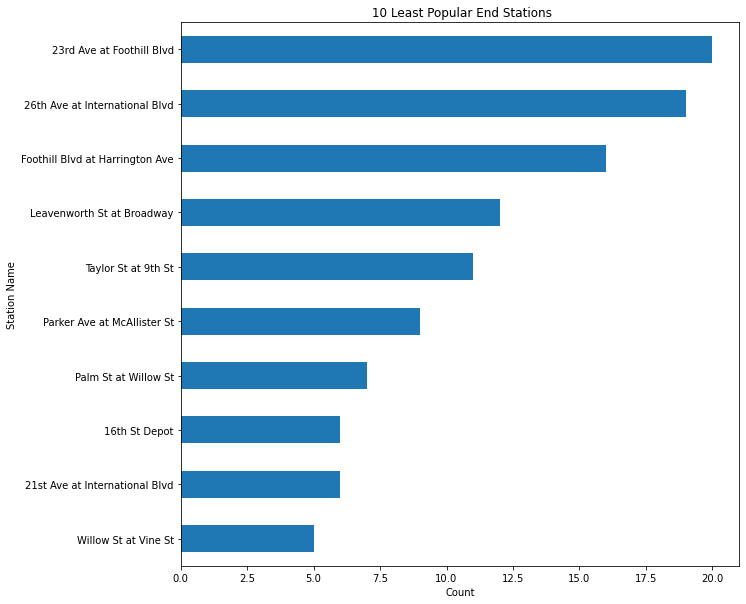

In [58]:
e_station = f_gobike_clean.end_station_name.value_counts().tail(10)
e_station.plot(kind="barh", figsize=(10,10))
title_axes("Count","Station Name",' 10 Least Popular End Stations')
plt.gca().invert_yaxis()
plt.show();

In [53]:
# Make new variable for start and end stations 
compare_start = f_gobike_clean.start_station_name.value_counts().tail(10)
compare_end = f_gobike_clean.end_station_name.value_counts().tail(10)

# Check wheter the station is popular in both start and end 
for s in compare_start.index:
    if s in compare_end:
        print(s)

23rd Ave at Foothill Blvd
Leavenworth St at Broadway
Taylor St at 9th St
Willow St at Vine St
Parker Ave at McAllister St
Palm St at Willow St
21st Ave at International Blvd
16th St Depot


Check the  10 least popular station for both start station and end station and visualized it using a horizontal bar chart. and also checked if they are similar stations betwen both and they have 8 stations in common which was displayed

### Bike User Type Comparison

In [20]:
f_gobike_clean.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

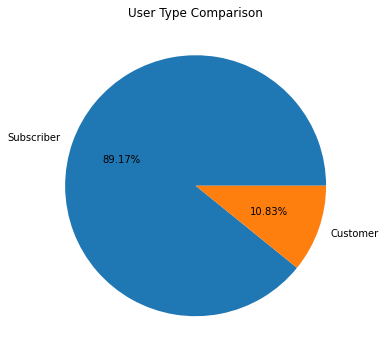

In [21]:
plt.figure(figsize=(10,6))
sorted_counts = f_gobike_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.2f%%');

plt.title('User Type Comparison');

Checked the type of users and plotted a pie chart showing the percentage of each

### How many bike are shared through the trips?

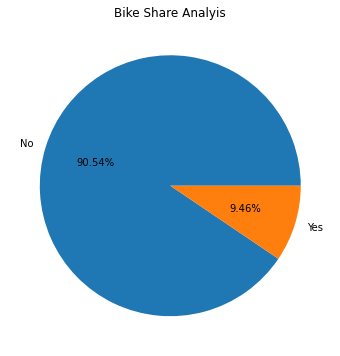

In [41]:
plt.figure(figsize=(10,6))
sorted_bike = f_gobike_clean['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_bike, labels = sorted_bike.index, autopct='%1.2f%%');

plt.title('Bike Share Analyis');

90.54% of bike are not shared only about 9.46% are shared



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes they are some problems such as:
--missing values
--doing some calculation and adding more columns

## Bivariate Exploration



In [22]:

customer=f_gobike_clean.user_type == 'Customer'
subscriber=f_gobike_clean.user_type == 'Subscriber'

### Does the User Type affect the time spent ?

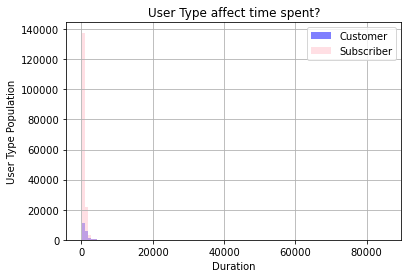

In [23]:
#bins=np.arange(0, 1000, 50)



show_chart(f_gobike_clean.duration_sec, customer, subscriber, 'blue', 'pink', 'Customer', 'Subscriber', 'User Type affect time spent?','Duration', 'User Type Population')
    


Subrcibred users spend more time using the bike and it is narrowed to one direction while the customer user type spend less time but has more varird duration

### What is the relationship between User Type and Time Spent?

In [24]:
f_gobike_clean.duration_sec[customer].mean()

1432.465019126233

In [25]:
f_gobike_clean.duration_sec[subscriber].mean()

640.2636782761825

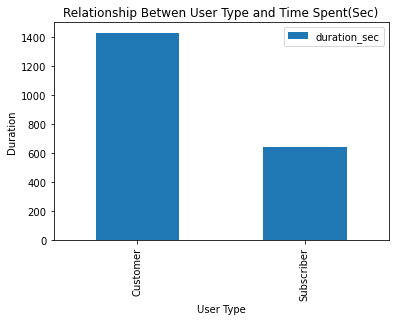

In [36]:
duration_user =f_gobike_clean[['user_type', 'duration_sec']].groupby('user_type').mean().plot(kind='bar');
title_axes('User Type','Duration','Relationship Betwen User Type and Time Spent(Sec)')

Customer average is higher than that of the subscriber

### Bike usage daily based on user type?

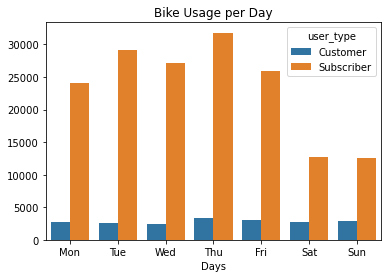

In [27]:
plt.title('Bike Usage per Day')
chart = sb.countplot(data=f_gobike_clean, x='start_time_weekday', order=days, hue='user_type')
chart.set(xlabel='Days', ylabel='');


The user type subscriber is high on weekdays aand low on weekends while the user type customer has slight changes among the days. the highest day is thursday for both customer and subscriber

### How much time is spent based on bike sharing?

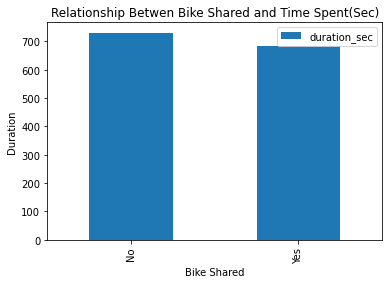

In [48]:
duration_user =f_gobike_clean[['bike_share_for_all_trip', 'duration_sec']].groupby('bike_share_for_all_trip').mean().plot(kind='bar');
title_axes('Bike Shared','Duration','Relationship Betwen Bike Shared and Time Spent(Sec)')

Bike not shared spends more time thsnt bike shared

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Yes, the user type has an influence on the use of the services

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The  customer use the bike less than the subsribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Comparisim between the user type based on the distance covered daily?

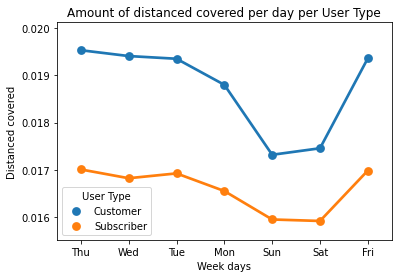

In [37]:


# plot the point plot of month vs user type

sb.pointplot(data=f_gobike_clean, x='start_time_weekday', y='distance_covered', hue='user_type', errwidth=0)
title_axes('Week days','Distanced covered','Amount of distanced covered per day per User Type')
plt.legend(title='User Type');

The day in which both the user type cover most distance is thursday

### Comparisim between the user type based on the distance covered daily?

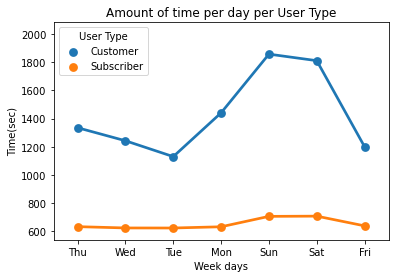

In [38]:

# plot the point plot of month vs user type

sb.pointplot(data=f_gobike_clean, x='start_time_weekday', y='duration_sec', hue='user_type', errwidth=0)
title_axes('Week days','Time(sec)','Amount of time per day per User Type')
plt.legend(title='User Type');

In the  graph they is a peak on sunday for both user type

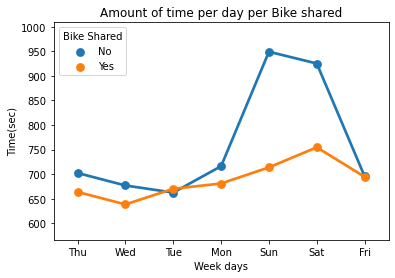

In [64]:
chart=sb.pointplot(data=f_gobike_clean, x='start_time_weekday', y='duration_sec', hue='bike_share_for_all_trip', errwidth=0)
title_axes('Week days','Time(sec)','Amount of time per day per Bike shared')
plt.legend(title='Bike Shared');


From the visualization we can see that on sunday bikes not shared covers more distance than other days while bike shared covers more distance on saturday

In [30]:
f_gobike_clean.to_csv('f_gobike_clean.csv',index=None)
f_gobike_new=pd.read_csv('f_gobike_clean.csv')

f_gobike_new

duration_sec               start_time                 end_time  \
0              52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1              42521  2019-02-28 18:53:21.789  2019-03-01 06:42:03.056   
2              61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
3              36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
4               1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
...              ...                      ...                      ...   
183407           480  2019-02-01 00:04:49.724  2019-02-01 00:12:50.034   
183408           313  2019-02-01 00:05:34.744  2019-02-01 00:10:48.502   
183409           141  2019-02-01 00:06:05.549  2019-02-01 00:08:27.220   
183410           139  2019-02-01 00:05:34.360  2019-02-01 00:07:54.287   
183411           271  2019-02-01 00:00:20.636  2019-02-01 00:04:52.058   

        start_station_id                                start_station_name  \
0                   21.0  Montgomery St BART Station (Market St at 2nd St)   
1                   23.0                     The Embarcadero at Steuart St   
2                   86.0                           Market St at Dolores St   
3                  375.0                           Grove St at Masonic Ave   
4                    7.0                               Frank H Ogawa Plaza   
...                  ...                                               ...   
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        end_station_id                              end_station_name  bike_id  \
0                 13.0                Commercial St at Montgomery St     4902   
1                 81.0                            Berry St at 4th St     2535   
2                  3.0  Powell St BART Station (Market St at 4th St)     5905   
3                 70.0                        Central Ave at Fell St     6638   
4                222.0                         10th Ave at E 15th St     4898   
...                ...                                           ...      ...   
183407           324.0           Union Square (Powell St at Post St)     4832   
183408            66.0                         3rd St at Townsend St     4960   
183409           277.0                     Morrison Ave at Julian St     3824   
183410           216.0                      San Pablo Ave at 27th St     5095   
183411            37.0                           2nd St at Folsom St     1057   

         user_type  member_birth_year member_gender bike_share_for_all_trip  \
0         Customer             1984.0          Male                      No   
1         Customer                NaN           NaN                      No   
2         Customer             1972.0          Male                      No   
3       Subscriber             1989.0         Other                      No   
4       Subscriber             1974.0          Male                     Yes   
...            ...                ...           ...                     ...   
183407  Subscriber             1996.0          Male                      No   
183408  Subscriber             1984.0          Male                      No   
183409  Subscriber             1990.0          Male                     Yes   
183410  Subscriber             1988.0          Male                      No   
183411  Subscriber             1989.0          Male                      No   

        distance_covered start_time_weekday          totalride_time  
0               0.005067                Thu  0 days 14:29:45.830000  
1               0.015730                Thu  0 days 11:48:41.267000  
2               0.027784                Thu  0 day

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, the user type has an influence on the use of the services


## Conclusions
> In summary the user type has so much effect on the other details. The customer use the bike more during the weekends more than the week days . while the subscribers use it more during the week days than the weekends
